# Predicción de Parkinson a partir de Datos de Tecleo

La enfermedad de Parkinson (EP) es un trastorno neurodegenerativo progresivo que afecta el sistema nervioso central, caracterizándose por la degeneración de neuronas dopaminérgicas en la sustancia negra del cerebro. Esta condición se manifiesta en síntomas motores. A 
medida que la población envejece, la 
prevalencia de la enfermedad de 
Parkinson está aumentando, lo que 
representa un desafío significativo para la 
salud pública. La detección temprana y el 
monitoreo de la progresión de la 
enfermedad son cruciales para el manejo 
adecuado de la condición. El desafío 
PhysioNet se centra en el análisis de datos 
relacionados con el comportamiento 
motor de los pacientes mediante la 
recopilación de datos de escritura a 
teclado. Se detallará el proceso de diseño 
y la evaluación de modelos de aprendizaje 
automático, específicamente un modelo 
de Gated Recurrent Unit (GRU), utilizado 
para clasificar a los pacientes según su 
condición.

## Datos

Contamos con muestras de tecleo de **85 pacientes**, de los cuales **43 están sanos** y **42 tienen la enfermedad de Parkinson**. 

Entre los datos que encontramos en los datasets se encuentran: 

- **pID**: ID del paciente.
- **gt**: Etiqueta que indica si el paciente tiene Parkinson (`True` para Parkinson y `False` para sano).
- **updrs108**: Unified Parkinson’s Disease Rating Scale part III (UPDRS-III).
- **afTap**: Resultado de Alternating Finger Tapping.
- **sTap**: Resultado de Single Key Tapping.
- **nqScore**: neuroQWERTY index (nQi).
- **Typing speed**: Velocidad de escritura.
- **file_n**: CSV con los datos de tecleo personales del paciente.

Cada archivo de datos de tecleo para cada paciente incluye:

- **La tecla presionada**.
- **Cuánto tiempo se mantuvo la tecla**.
- **Tiempo de liberación de la tecla** desde el segundo 0.
- **Tiempo en que se presionó la tecla** desde el segundo 0.


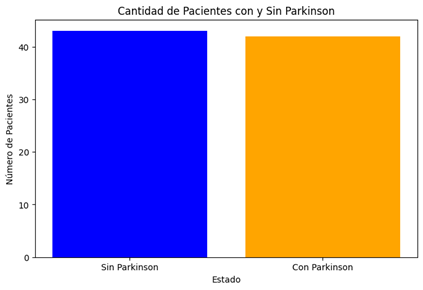
- Ilustración 1: Pacientes con y sin EF

## Limpieza de datos

Algunos pacientes 
cuentan con dos muestras de tecleo, por 
lo que en esos casos solo se usara una 
para que tengamos la misma cantidad de 
información para todos los pacientes. 
Algunas muestras duran mas que otras 
por lo que se usará la información 
recopilada hasta el segundo 563 para cada 
archivo ya que todos los pacientes 
teclearon mínimo 563 segundos. Los 
valores anómalos se limpiaron usando 
desviación estándar e IQR. 

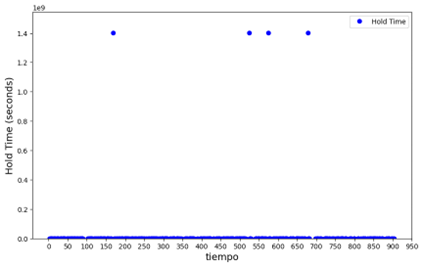
- Ilustración 2: Gráfico Hold time vs tiempo sin limpiar, 
paciente 60

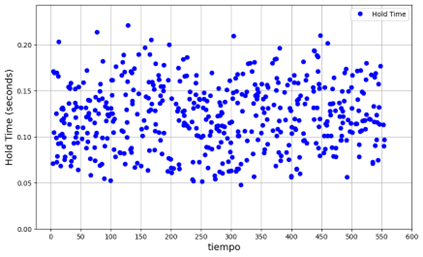 
- Ilustración 3: Gráfico Hold time vs tiempo limpio, paciente 60 

## Manejo de los datos

En base al archivo 
general se uso solo las columnas de pID, 
gt y typing speed ya que son los datos que 
se usaran para la resolución del problema. 
En cuanto a los CSV pertenecientes a la 
información de cada paciente, la 
información se usó para calcular varios 
nqScore en intervalos de 20 segundos 
para poder tener datos secuenciales por 
cada paciente y poder aplicar GRU. 

## nqScore

El nqScore (neuroQWERTY 
index) es una métrica utilizada para 
evaluar la actividad motora de los 
pacientes, especialmente en el contexto de 
trastornos neurológicos como la 
enfermedad de Parkinson. Este índice se 
calcula a partir de datos recopilados 
durante tareas de escritura a teclado, 
analizando parámetros como el tiempo de 
retención de las pulsaciones de teclas, la 
duración de las presiones y los tiempos de 
liberación 

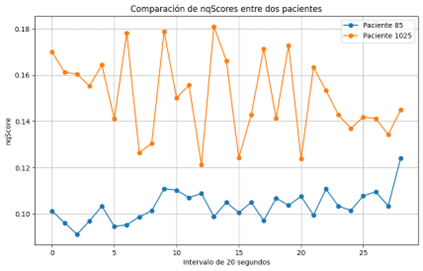
- Ilustración 4: Comparación de nqScore de paciente 85 y 1025

En la ilustración 4 podemos ver 
graficados los 28 nqScore calculados del 
paciente 85 y 1025 cada puntaje se 
calculo cada 20 segundos de un total 
aproximado de 560 segundos de tecleo 
que tiene cada paciente en su respectivo 
archivo. La ilustración nos muestra una 
clara separación entre ambos pacientes 
siendo el paciente 1025 una persona con 
Parkinson y el paciente 85 una persona 
sin Parkinson 

## Selección del modelo

Para el análisis de 
los datos de los sujetos con Parkinson, se 
eligió un modelo de Red Neuronal 
Recurrente (RNN), específicamente la 
variante llamada Gated Recurrent Unit 
(GRU). La razón detrás de esta elección 
incluye: 
- **Naturaleza Secuencial de los 
Datos**: Dado que los datos 
recopilados están relacionados con 
el tiempo (tecleos a intervalos de 
20 segundos), los modelos RNN, 
y en particular GRU, son efectivos 
para aprender patrones 
temporales. 
- **Conjunto de Datos limitados**: 
GRU es bueno cuando se trabaja 
con un tamaño de conjunto de 
datos limitado como lo es en este 
caso que se cuenta con 85 sujetos. 
- **Flexibilidad en La Captura de 
Patrones Complejos**: Los datos 
de tecleo pueden estar 
influenciados por diversos 
factores externos que afectan la 
manera en que los pacientes 
escriben y como las GRU son 
capaces de aprender patrones 
complejos y no lineales esto puede 
ser beneficioso para este caso. 

## Entrenamiento y Evaluación de Modelos

Como se menciono 
anteriormente se implemento el 
modelo de red neuronal GRU para 
clasificar la presencia de Parkinson en 
función de las puntuaciones de 
nqScore derivadas de los datos de 
tecleo. Los pasos realizados fueron: 
- **Preparación de Datos**: Los 
datos fueron cargados desde 
archivos CSV (datos.csv y 
archivos aparte que contenía: 
Key Pressed,Hold Duration 
(s),Key Release Time (s),Key 
Press Time (s)). Las 
puntuaciones de nqScore 
fueron calculadas utilizando 
una función que analiza los 
tiempos de retención de las 
pulsaciones de teclas en el 
archivo de cada paciente, 
dividiendo los datos 
recopilados en 560 segundos 
aproximadamente en 
intervalos de 20 segundos y 
así generando varios nqScore 
por paciente para así tener 
datos secuenciales y poder 
usar GRU.  
- **División de datos**: Se 
separaron los datos en 
conjuntos de entrenamiento y 
prueba. El 80% de los datos se 
utilizó para el entrenamiento 
del modelo, mientras que el 
20% restante se reservó para 
evaluar la capacidad de 
predecir. 
- **Evaluación del modelo**: 
Después del entrenamiento, el 
modelo fue evaluado 
utilizando el conjunto de 
prueba. Se calculó la 
precisión, así como otras 
métricas de rendimiento, como 
el recall y el F1-score. Estas 
métricas aparte de solo el 
accuracy son importantes para 
entender la capacidad 
predictiva del modelo que se 
entrenó.

## Resultados

Los resultados mostraron 
que el modelo alcanzó una precisión 
del 82,35%, con un reporte de 
clasificación que nos muestra de 
manera mas detallada la capacidad del 
modelo de identificar correctamente a 
los pacientes con y sin Parkinson. 

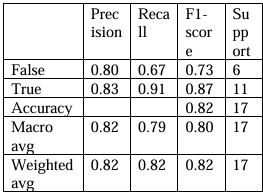

- **Presición**: El 80% de los pacientes 
predichos como sanos, realmente no 
“modelo_gru.h5” el modelo con 
tenían la enfermedad. El 83% de los 
pacientes predichos como enfermos, 
realmente tenían Parkinson.

- **Recall**: El 67% de los verdaderos 
negativos fueron identificados 
correctamente y el 91% de los 
verdaderos positivos fueron 
correctamente identificados.

- **F1-Score**: 73%, refleja un equilibrio 
entre precisión y recall, pero sugiere 
que hay margen para mejorar la 
detección de pacientes sanos. 87%, 
indica un buen equilibrio y una alta 
efectividad en la detección de 
pacientes con Parkinson.

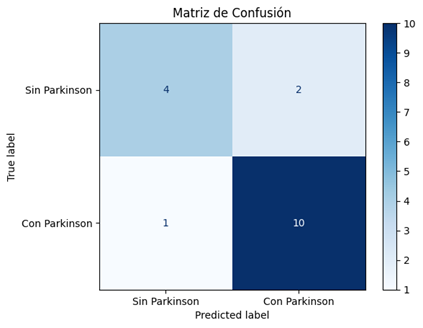
- Ilustración 4: Matriz de confusión del modelo 

El modelo mostro una precisión del 
82% en general, lo que significa que 
en la mayoría de los casos podrá 
predecir bien, pero puede fallar, por lo 
que no debería tomarse como un 
diagnóstico médico, pero si pudiese 
usarse para hacerse una idea y en base 
a eso hacerse exámenes médicos para 
la detección de Parkinson. 